# **Naive Bayes model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation

from sklearn.naive_bayes import GaussianNB

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-09 19:50:53.390245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 19:50:53.902727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-09 19:50:53.902786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-09 19:50:53.902791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/GNB/2023-03-09_19-50-54


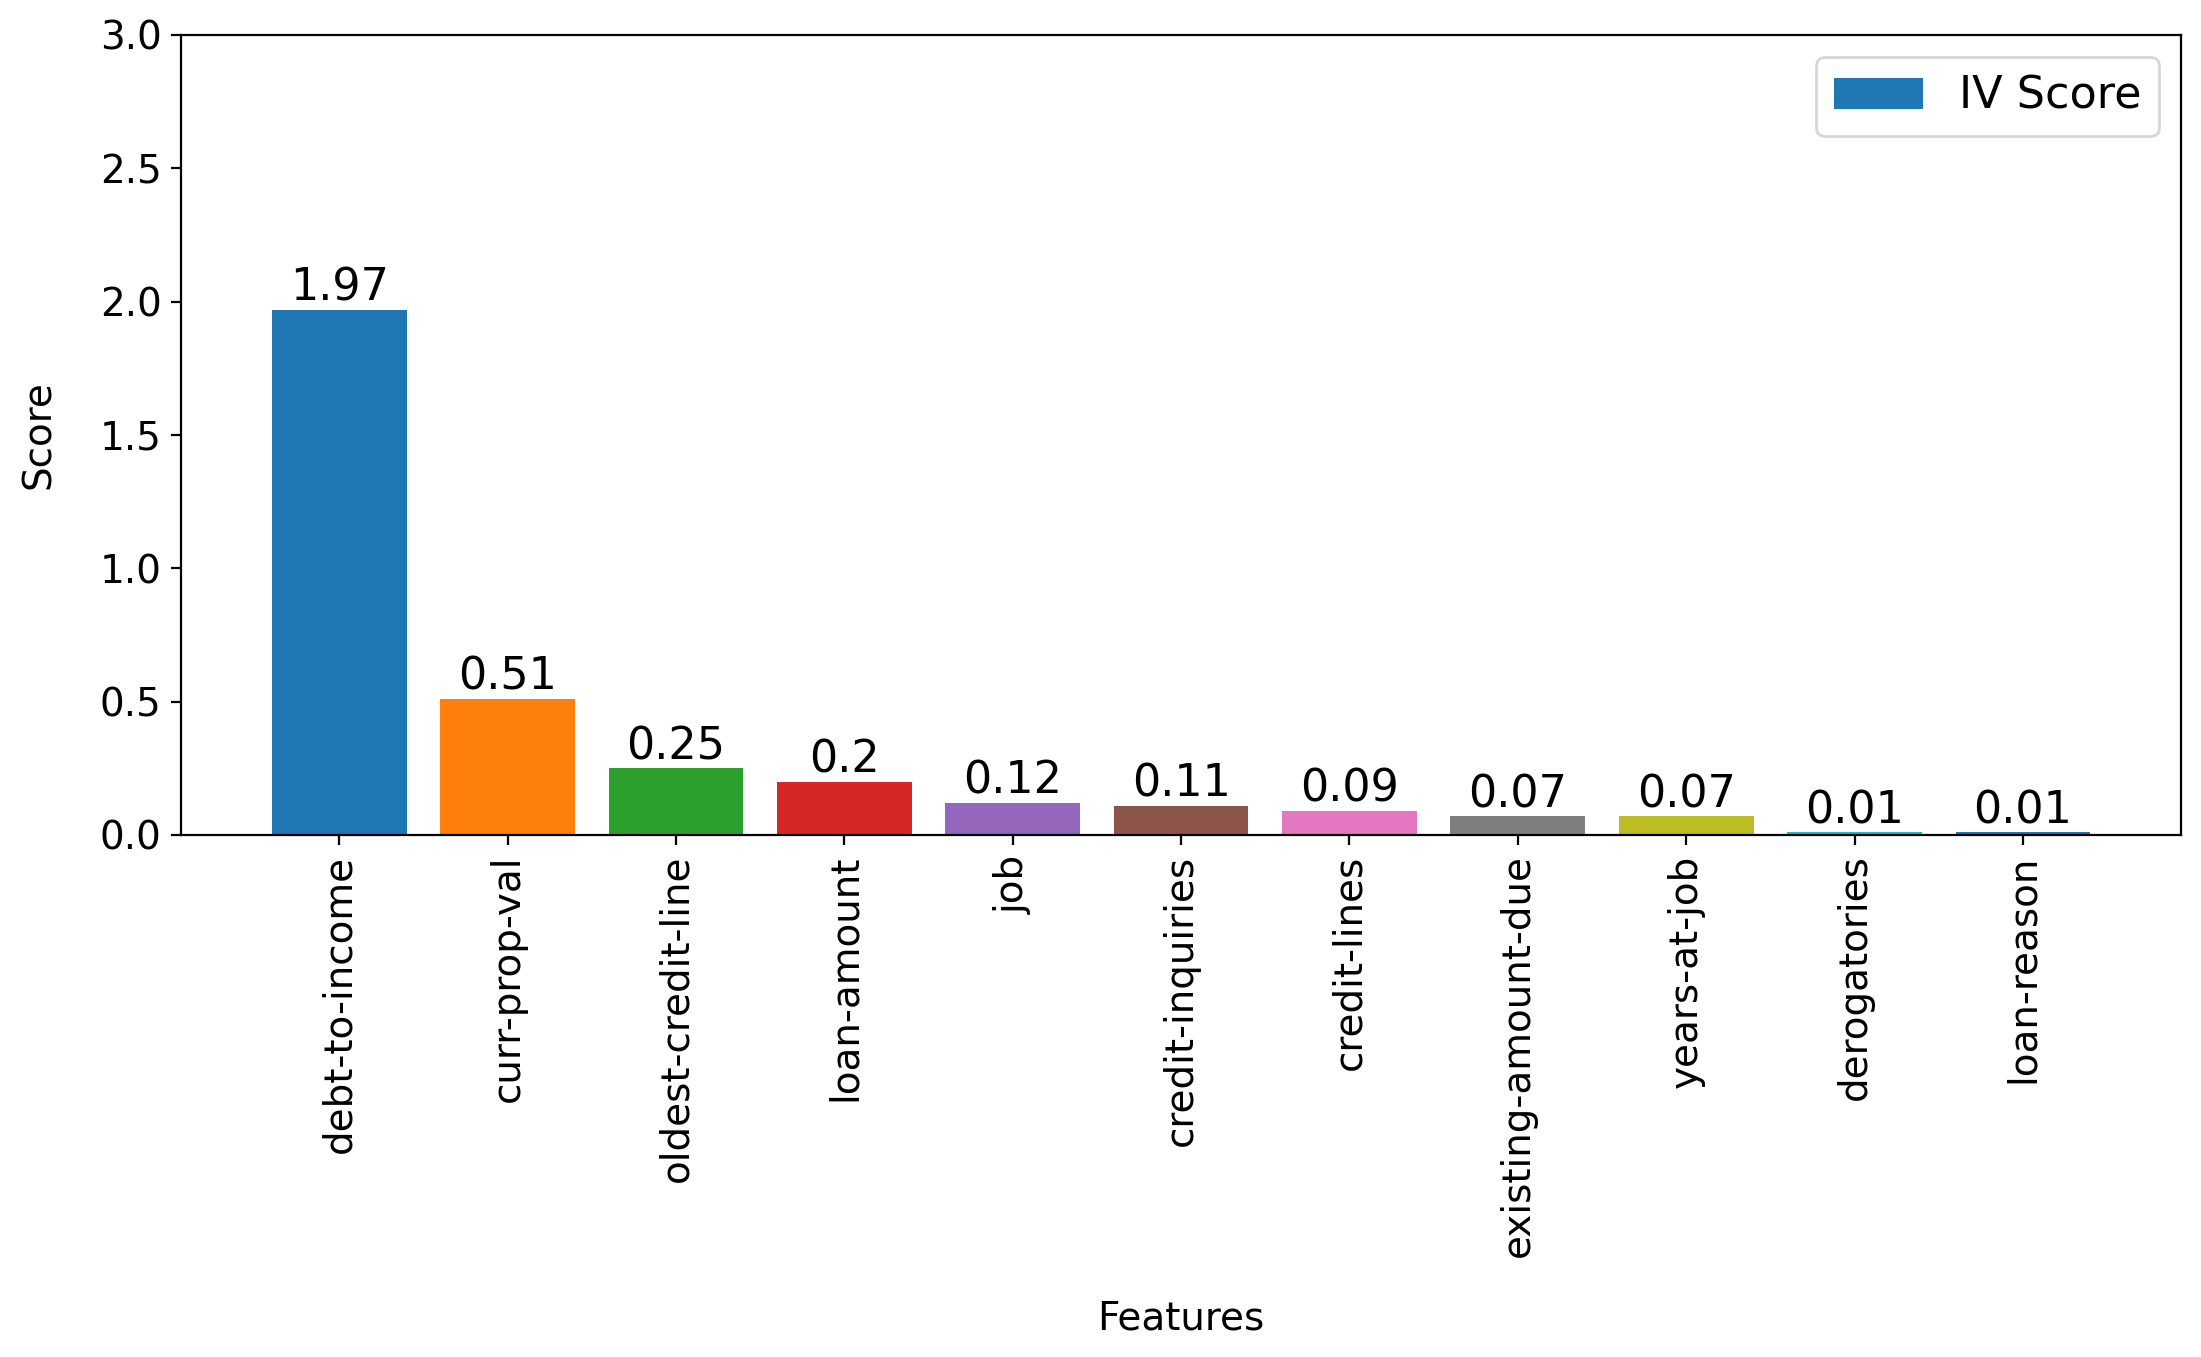

Selected Features: ['loan-amount', 'existing-amount-due', 'curr-prop-val', 'loan-reason', 'job', 'years-at-job', 'derogatories', 'oldest-credit-line', 'credit-inquiries', 'credit-lines', 'debt-to-income']


0it [00:00, ?it/s]

# **FOLD 1**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       382
           1       0.60      0.58      0.59        95

    accuracy                           0.84       477
   macro avg       0.75      0.74      0.74       477
weighted avg       0.84      0.84      0.84       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 2**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       382
           1       0.70      0.60      0.65        95

    accuracy                           0.87       477
   macro avg       0.80      0.77      0.78       477
weighted avg       0.86      0.87      0.87       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 3**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.61      0.61      0.61       856

    accuracy                           0.85      4291
   macro avg       0.76      0.76      0.76      4291
weighted avg       0.85      0.85      0.85      4291

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       382
           1       0.55      0.60      0.58        95

    accuracy                           0.82       477
   macro avg       0.73      0.74      0.73       477
weighted avg       0.83      0.82      0.83       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 4**

/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
4it [00:00, 38.14it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.62      0.61       856

    accuracy                           0.84      4291
   macro avg       0.75      0.76      0.76      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       382
           1       0.54      0.62      0.58        95

    accuracy                           0.82       477
   macro avg       0.72      0.75      0.73       477
weighted avg       0.83      0.82      0.82       477



# **FOLD 5**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.61      0.61      0.61       856

    accuracy                           0.85      4291
   macro avg       0.76      0.76      0.76      4291
weighted avg       0.85      0.85      0.85      4291

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       382
           1       0.51      0.49      0.50        95

    accuracy                           0.81       477
   macro avg       0.69      0.69      0.69       477
weighted avg       0.80      0.81      0.80       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 6**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.59      0.59      0.59       856

    accuracy                           0.84      4291
   macro avg       0.74      0.74      0.74      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       382
           1       0.66      0.69      0.68        95

    accuracy                           0.87       477
   macro avg       0.79      0.80      0.80       477
weighted avg       0.87      0.87      0.87       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 7**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3435
           1       0.60      0.61      0.60       856

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       382
           1       0.59      0.60      0.60        95

    accuracy                           0.84       477
   macro avg       0.75      0.75      0.75       477
weighted avg       0.84      0.84      0.84       477



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 8**

/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
8it [00:00, 38.66it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.60      0.60      0.60       855

    accuracy                           0.84      4291
   macro avg       0.75      0.75      0.75      4291
weighted avg       0.84      0.84      0.84      4291

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       381
           1       0.62      0.61      0.62        96

    accuracy                           0.85       477
   macro avg       0.76      0.76      0.76       477
weighted avg       0.85      0.85      0.85       477



# **FOLD 9**

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.60      0.60      0.60       856

    accuracy                           0.84      4292
   macro avg       0.75      0.75      0.75      4292
weighted avg       0.84      0.84      0.84      4292

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       381
           1       0.64      0.56      0.60        95

    accuracy                           0.85       476
   macro avg       0.77      0.74      0.75       476
weighted avg       0.84      0.85      0.84       476



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))


# **FOLD 10**

/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
10it [00:00, 38.70it/s]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3436
           1       0.59      0.60      0.60       856

    accuracy                           0.84      4292
   macro avg       0.75      0.75      0.75      4292
weighted avg       0.84      0.84      0.84      4292

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       381
           1       0.60      0.71      0.65        95

    accuracy                           0.85       476
   macro avg       0.76      0.79      0.77       476
weighted avg       0.86      0.85      0.85       476



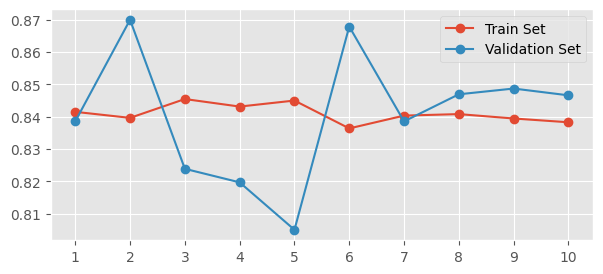

Average Train Set Accuracy: 0.841023589545556
Average Validation Set Accuracy: 0.8406069975159876


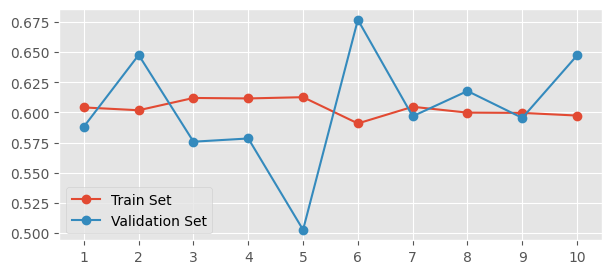

Average Train Set F1 Score: 0.603507202243049
Average Validation Set F1 Score: 0.6027256687876521


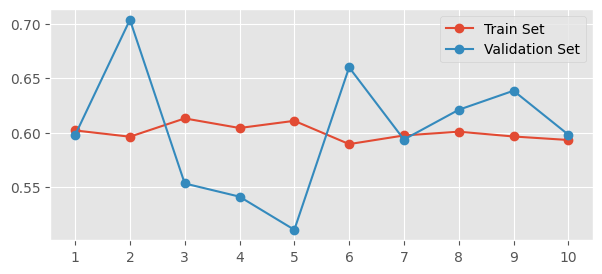

Average Train Set Precision: 0.6004614125469279
Average Validation Set Precision: 0.6018652951960471


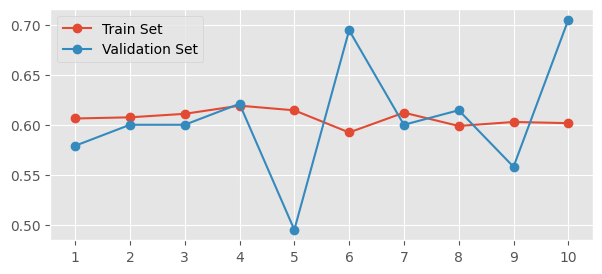

Average Train Set Recall: 0.6066120128982894
Average Validation Set Recall: 0.6067214912280702


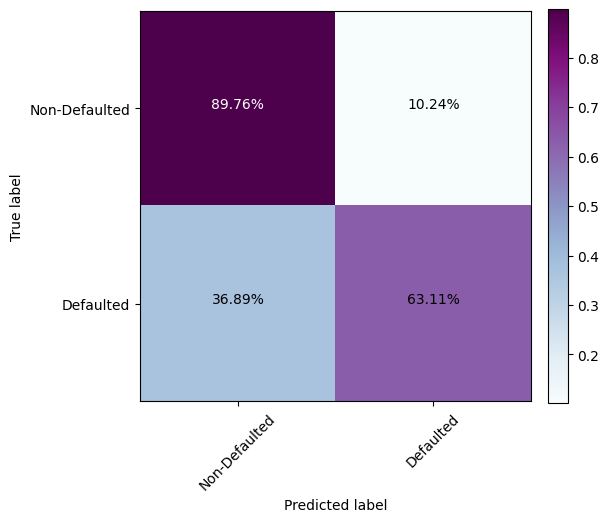

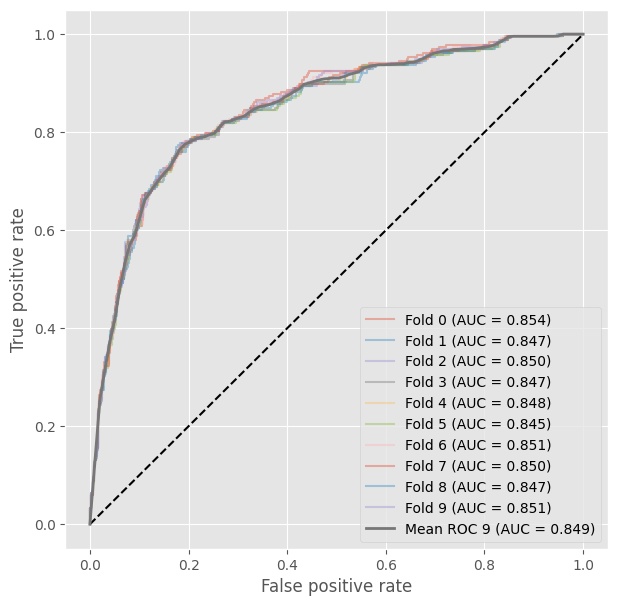

Gini derived from mean AUC 0.6980222391987096


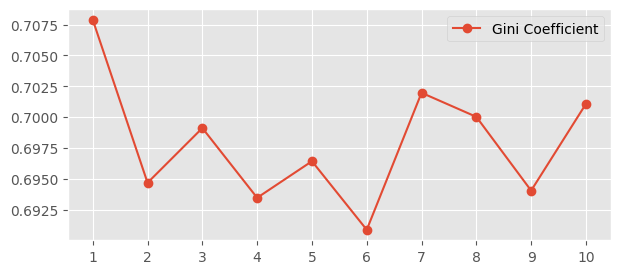

Average Gini Coefficient: 0.6979678663918397


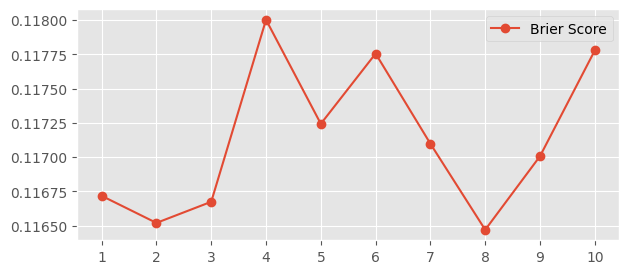

Average Brier Score: 0.11712652426837127


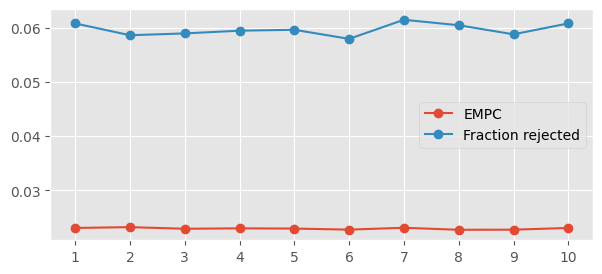

Average EMP: 0.022975499656547
Average EMP Fractions: 0.05964815774064232


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

gnbc = GaussianNB()

evaluation.k_fold_cross_validate(clf=gnbc, layers=None, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=10, features_scores=features_scores,
                                 features=11, model_name='GNB', learning_rate=None,
                                 epochs=None, batch_size=None, verbose=True)